In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv('data/Billionaire.csv')
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


# PreProcess
- Identify null values in the dataset

In [90]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

- Substitute Average age for null age filds.
- Calculate variance age

In [91]:
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)
mean_age

63.1136023916293

In [92]:
variance_age = data['Age'].var()
variance_age

175.5865885522675

- Delete B and $ caracters from NetWorth column.

In [93]:
data['NetWorth'] = data['NetWorth'].str.strip('$')
data['NetWorth'] = data['NetWorth'].str.strip('B')
data['NetWorth'] = data['NetWorth'].astype(float)
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


# Process

In [94]:
df = data.sort_values(by=['NetWorth'], ascending=False).head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


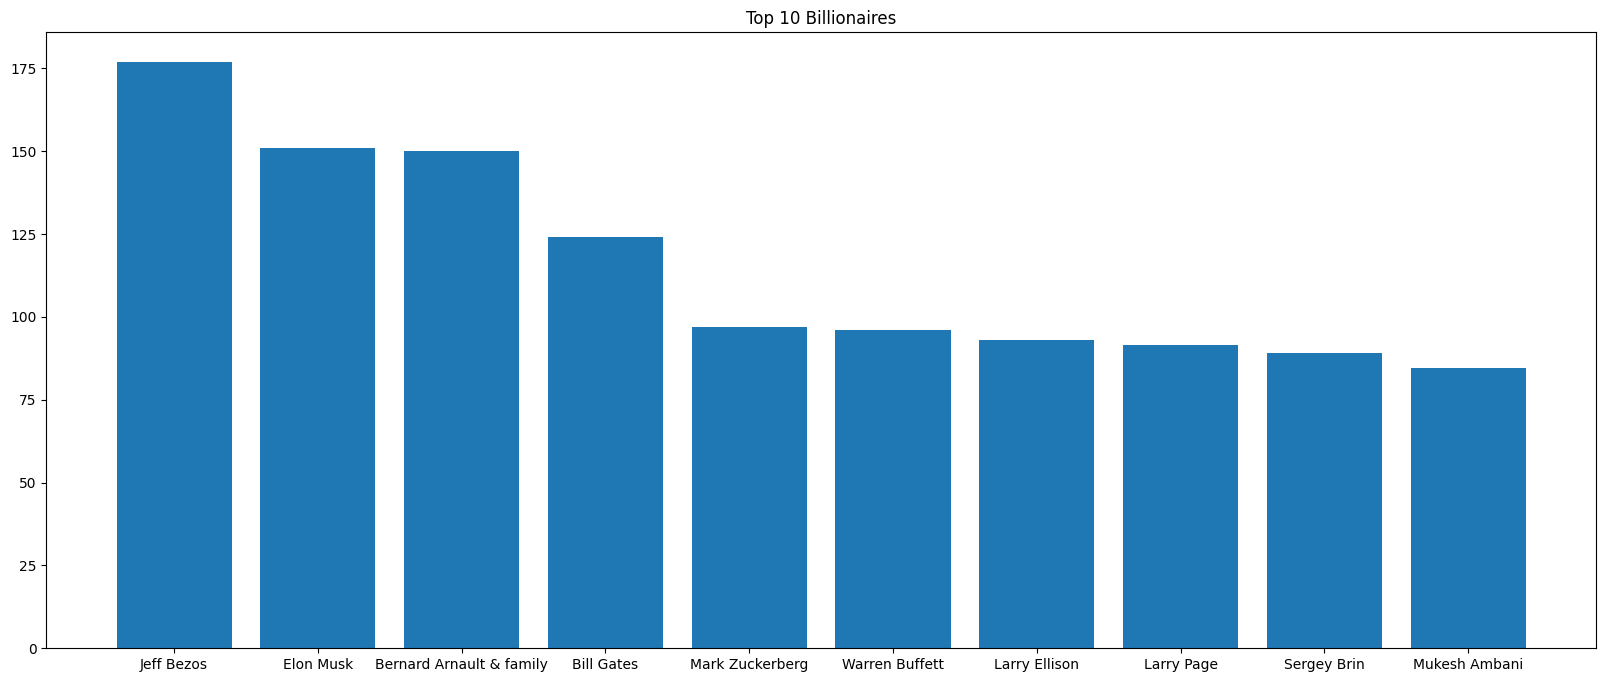

In [95]:
plt.figure(figsize=(20, 8))
plt.bar(df['Name'], df['NetWorth'])
plt.title('Top 10 Billionaires')
plt.show()

In [96]:
df = data['Source'].value_counts().head(10).reset_index()
df.rename(columns={'Source': 'Count', 'index': 'Source'}, inplace=True)
df

,Source,Count
0,real estate,171
1,pharmaceuticals,99
2,investments,90
3,diversified,85
4,software,62
5,retail,47
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


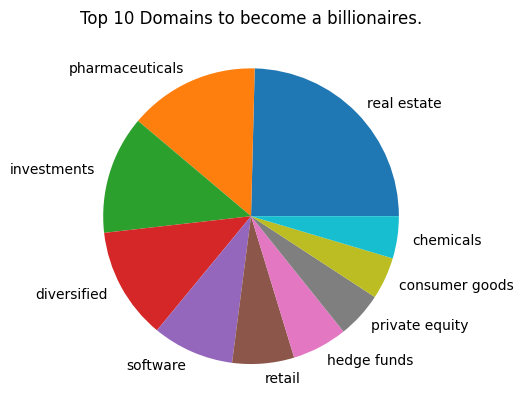

In [97]:
plt.pie(df['Count'], labels=df['Source'])
plt.title('Top 10 Domains to become a billionaires.')
plt.show()

In [98]:
df = data['Industry'].value_counts().reset_index()
df.rename(columns={'Industry': 'Count', 'index': 'Industry'}, inplace=True)
df

,Industry,Count
0,Finance & Investments,371
1,Technology,365
2,Manufacturing,331
3,Fashion & Retail,273
4,Healthcare,221
5,Food & Beverage,219
6,Real Estate,215
7,Diversified,188
8,Energy,100
9,Media & Entertainment,95


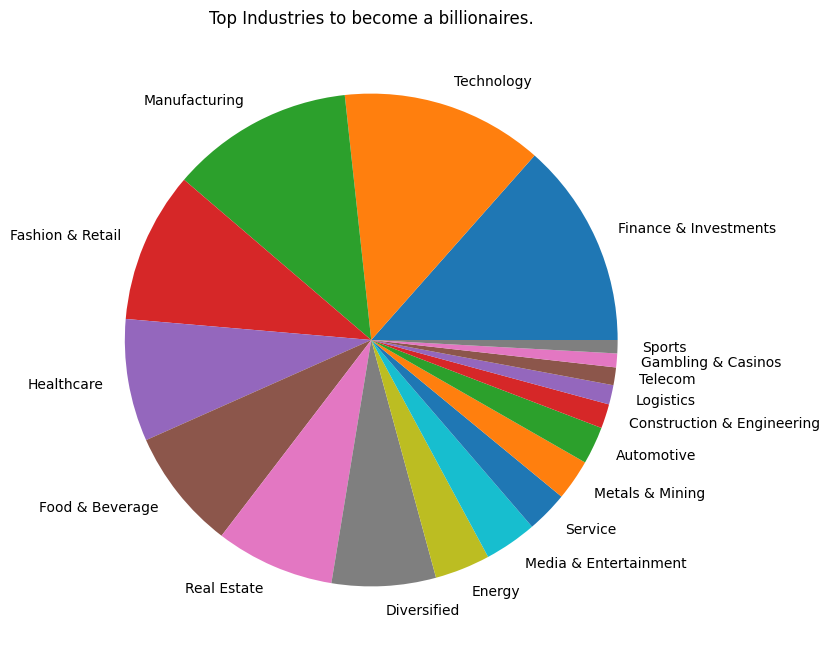

In [99]:
plt.figure(figsize=(24, 8))
plt.pie(df['Count'], labels=df['Industry'])
plt.title('Top Industries to become a billionaires.')
plt.show()

In [100]:
df = data['Country'].value_counts().head().reset_index()
df.rename(columns={'Country': 'Count', 'index': 'Country'}, inplace=True)

df

,Country,Count
0,United States,724
1,China,626
2,India,140
3,Germany,136
4,Russia,118


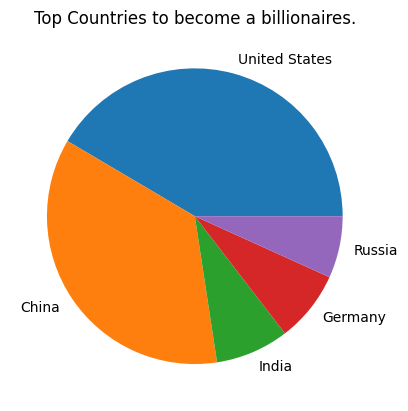

In [101]:
plt.pie(df['Count'], labels=df['Country'])
plt.title('Top Countries to become a billionaires.')
plt.show()

In [102]:
df = data.groupby('Country')['NetWorth'].sum().reset_index()
df = df.sort_values(by=['NetWorth'], ascending=False).reset_index()
df


,index,Country,NetWorth
0,66,United States,4398.4
1,8,China,2531.9
2,18,Germany,625.5
3,24,India,596.4
4,50,Russia,586.0
...,...,...,...
65,43,Oman,2.3
66,56,St. Kitts and Nevis,1.6
67,60,Tanzania,1.6
68,69,Zimbabwe,1.5


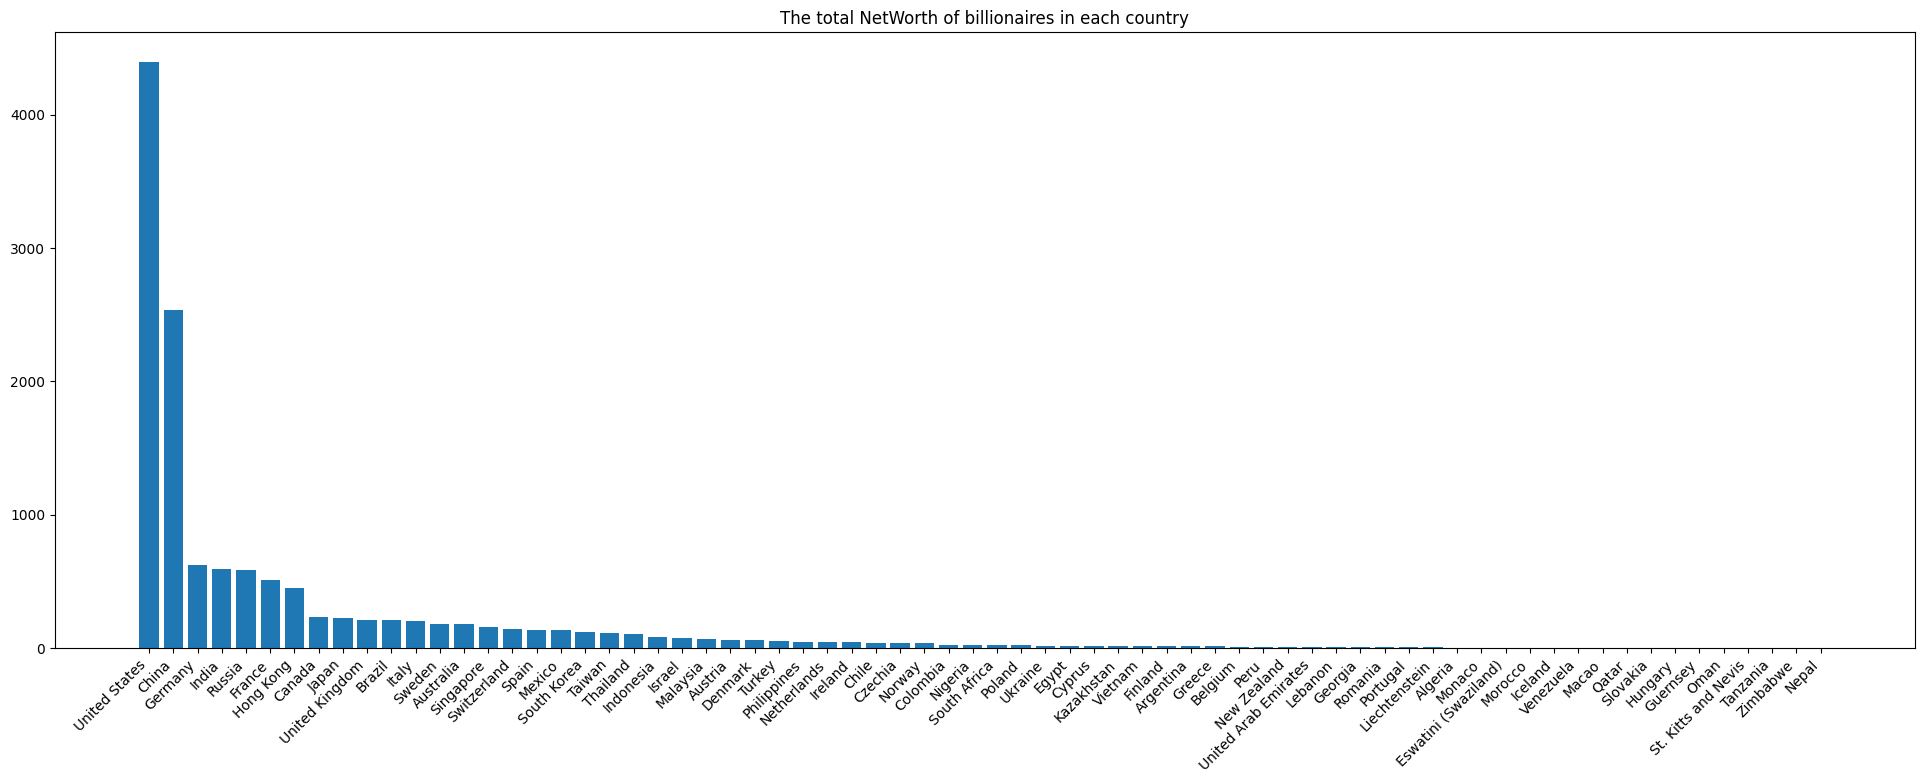

In [103]:
plt.figure(figsize=(24, 8))
plt.bar(df['Country'], df['NetWorth'])
plt.xticks(rotation=45, ha='right')
plt.title('The total NetWorth of billionaires in each country')
plt.show()

In [104]:
df = data[data['Country'] == 'United States'].head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,7,Larry Page,91.5,United States,Google,8,48.0,Technology
7,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,13,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,16,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


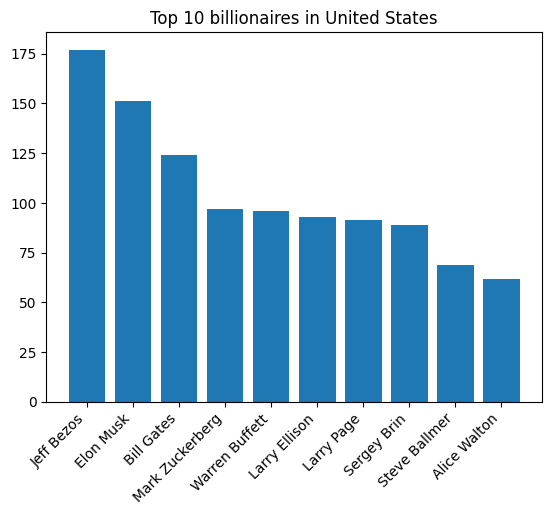

In [105]:
plt.bar(df['Name'], df['NetWorth'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 billionaires in United States')
plt.show()

In [106]:
df = data['Country'].value_counts().reset_index().sort_values(by=['Country'], ascending=True).head(10).reset_index()
df.rename(columns={'Country': 'Count', 'index': 'Country'}, inplace=True)
df

,level_0,Country,Count
0,69,Nepal,1
1,59,Zimbabwe,1
2,60,St. Kitts and Nevis,1
3,61,Tanzania,1
4,62,Macao,1
5,68,Liechtenstein,1
6,64,Guernsey,1
7,65,Venezuela,1
8,66,Eswatini (Swaziland),1
9,67,Algeria,1


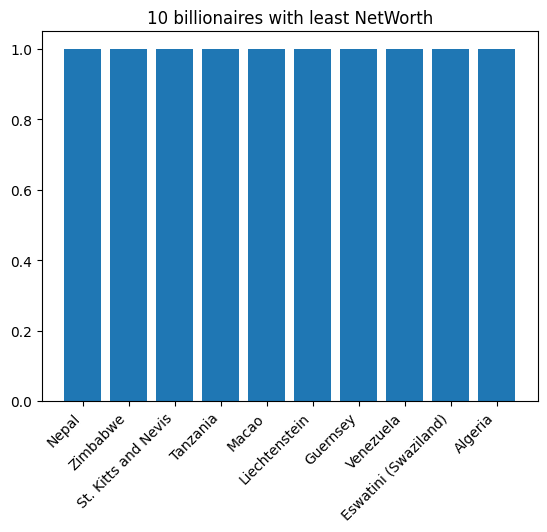

In [110]:
plt.bar(df['Country'], df['Count'])
plt.xticks(rotation=45, ha='right')
plt.title('10 billionaires with least NetWorth')
plt.show()